<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/191209_objectdetectionclassifier_ssdlite_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [4]:
cd /content/models/research/object_detection

/content/models/research/object_detection


In [5]:
!wget http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz

--2019-12-09 10:32:57--  http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.119.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51025348 (49M) [application/x-tar]
Saving to: ‘ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz’

ssdlite_mobilenet_v 100%[===================>]  48.66M  82.9MB/s    in 0.6s    

2019-12-09 10:32:58 (82.9 MB/s) - ‘ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz’ saved [51025348/51025348]



In [0]:
!tar -xf ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz

In [7]:
!git clone https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10.git

Cloning into 'TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10'...
remote: Enumerating objects: 1129, done.
remote: Total 1129 (delta 0), reused 0 (delta 0), pack-reused 1129
Receiving objects: 100% (1129/1129), 57.63 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (566/566), done.


In [0]:
!cp -R /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/doc /content/models/research/object_detection
#!cp -R /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/images /content/models/research/object_detection
#!cp -R /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/inference_graph /content/models/research/object_detection
!cp -R /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/training /content/models/research/object_detection
!cp -R /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/translate /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/generate_tfrecord.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/Object_detection_image.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/Object_detection_video.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/Object_detection_webcam.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/resizer.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/test.mov /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/test1.JPG /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/xml_to_csv.py /content/models/research/object_detection
!cp  /content/models/research/object_detection/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/README.md /content/models/research/object_detection

In [9]:
cd /content/models/research/

/content/models/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
!python setup.py build

In [0]:
!python setup.py install

In [13]:
cd /content/models/research/object_detection

/content/models/research/object_detection


In [0]:
!mkdir images
!mkdir inference_graph

In [0]:
!cp -r /gdrive/My\ Drive/colabfiles/lektion31/images/test /content/models/research/object_detection/images
!cp -r /gdrive/My\ Drive/colabfiles/lektion31/images/train /content/models/research/object_detection/images
!cp /gdrive/My\ Drive/colabfiles/lektion31/test_labels.csv /content/models/research/object_detection/images
!cp /gdrive/My\ Drive/colabfiles/lektion31/train_labels.csv /content/models/research/object_detection/images

In [16]:
%%writefile generate_tfrecord.py

"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

  # Create test data:
  python generate_tfrecord.py --csv_input=images/test_labels.csv  --image_dir=images/test --output_path=test.record
"""
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('image_dir', '', 'Path to the image directory')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'rasti':
        return 1

    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), FLAGS.image_dir)
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':
    tf.app.run()

Overwriting generate_tfrecord.py


In [17]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record



W1209 10:42:54.428231 140685356410752 module_wrapper.py:139] From generate_tfrecord.py:88: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1209 10:42:54.483097 140685356410752 module_wrapper.py:139] From generate_tfrecord.py:47: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/object_detection/train.record


In [18]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record



W1209 10:43:00.452557 140646703986560 module_wrapper.py:139] From generate_tfrecord.py:88: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1209 10:43:00.496000 140646703986560 module_wrapper.py:139] From generate_tfrecord.py:47: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [0]:
!rm /content/models/research/object_detection/training/faster_rcnn_inception_v2_pets.config
!rm /content/models/research/object_detection/training/labelmap.pbtxt

In [20]:
%%writefile training/label_map.pbtxt

item {
  id: 1
  name: 'rasti'
}


Writing training/label_map.pbtxt


In [21]:
%%writefile training/ssdlite_mobilenet_v2_coco.config

# SSDLite with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 3
        use_depthwise: true
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2'
      min_depth: 16
      depth_multiplier: 1.0
      use_depthwise: true
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 24
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  fine_tune_checkpoint: "/content/models/research/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09/model.ckpt"
  fine_tune_checkpoint_type:  "detection"
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps: 200000
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    input_path: "/content/models/research/object_detection/train.record"
  }
  label_map_path: "/content/models/research/object_detection/training/label_map.pbtxt"
}

eval_config: {
  num_examples: 8000
  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
    input_path: "/content/models/research/object_detection/test.record"
  }
  label_map_path: "/content/models/research/object_detection/training/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}

Writing training/ssdlite_mobilenet_v2_coco.config


In [22]:
%%writefile train.py

# Copyright 2017 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

r"""Training executable for detection models.

This executable is used to train DetectionModels. There are two ways of
configuring the training job:

1) A single pipeline_pb2.TrainEvalPipelineConfig configuration file
can be specified by --pipeline_config_path.

Example usage:
    ./train \
        --logtostderr \
        --train_dir=path/to/train_dir \
        --pipeline_config_path=pipeline_config.pbtxt

2) Three configuration files can be provided: a model_pb2.DetectionModel
configuration file to define what type of DetectionModel is being trained, an
input_reader_pb2.InputReader file to specify what training data will be used and
a train_pb2.TrainConfig file to configure training parameters.

Example usage:
    ./train \
        --logtostderr \
        --train_dir=path/to/train_dir \
        --model_config_path=model_config.pbtxt \
        --train_config_path=train_config.pbtxt \
        --input_config_path=train_input_config.pbtxt
"""

import functools
import json
import os
import tensorflow as tf

from object_detection.builders import dataset_builder
from object_detection.builders import graph_rewriter_builder
from object_detection.builders import model_builder
from object_detection.legacy import trainer
from object_detection.utils import config_util

tf.logging.set_verbosity(tf.logging.INFO)

flags = tf.app.flags
flags.DEFINE_string('master', '', 'Name of the TensorFlow master to use.')
flags.DEFINE_integer('task', 0, 'task id')
flags.DEFINE_integer('num_clones', 1, 'Number of clones to deploy per worker.')
flags.DEFINE_boolean('clone_on_cpu', False,
                     'Force clones to be deployed on CPU.  Note that even if '
                     'set to False (allowing ops to run on gpu), some ops may '
                     'still be run on the CPU if they have no GPU kernel.')
flags.DEFINE_integer('worker_replicas', 1, 'Number of worker+trainer '
                     'replicas.')
flags.DEFINE_integer('ps_tasks', 0,
                     'Number of parameter server tasks. If None, does not use '
                     'a parameter server.')
flags.DEFINE_string('train_dir', '',
                    'Directory to save the checkpoints and training summaries.')

flags.DEFINE_string('pipeline_config_path', '',
                    'Path to a pipeline_pb2.TrainEvalPipelineConfig config '
                    'file. If provided, other configs are ignored')

flags.DEFINE_string('train_config_path', '',
                    'Path to a train_pb2.TrainConfig config file.')
flags.DEFINE_string('input_config_path', '',
                    'Path to an input_reader_pb2.InputReader config file.')
flags.DEFINE_string('model_config_path', '',
                    'Path to a model_pb2.DetectionModel config file.')

FLAGS = flags.FLAGS


@tf.contrib.framework.deprecated(None, 'Use object_detection/model_main.py.')
def main(_):
  assert FLAGS.train_dir, '`train_dir` is missing.'
  if FLAGS.task == 0: tf.gfile.MakeDirs(FLAGS.train_dir)
  if FLAGS.pipeline_config_path:
    configs = config_util.get_configs_from_pipeline_file(
        FLAGS.pipeline_config_path)
    if FLAGS.task == 0:
      tf.gfile.Copy(FLAGS.pipeline_config_path,
                    os.path.join(FLAGS.train_dir, 'pipeline.config'),
                    overwrite=True)
  else:
    configs = config_util.get_configs_from_multiple_files(
        model_config_path=FLAGS.model_config_path,
        train_config_path=FLAGS.train_config_path,
        train_input_config_path=FLAGS.input_config_path)
    if FLAGS.task == 0:
      for name, config in [('model.config', FLAGS.model_config_path),
                           ('train.config', FLAGS.train_config_path),
                           ('input.config', FLAGS.input_config_path)]:
        tf.gfile.Copy(config, os.path.join(FLAGS.train_dir, name),
                      overwrite=True)

  model_config = configs['model']
  train_config = configs['train_config']
  input_config = configs['train_input_config']

  model_fn = functools.partial(
      model_builder.build,
      model_config=model_config,
      is_training=True)

  def get_next(config):
    return dataset_builder.make_initializable_iterator(
        dataset_builder.build(config)).get_next()

  create_input_dict_fn = functools.partial(get_next, input_config)

  env = json.loads(os.environ.get('TF_CONFIG', '{}'))
  cluster_data = env.get('cluster', None)
  cluster = tf.train.ClusterSpec(cluster_data) if cluster_data else None
  task_data = env.get('task', None) or {'type': 'master', 'index': 0}
  task_info = type('TaskSpec', (object,), task_data)

  # Parameters for a single worker.
  ps_tasks = 0
  worker_replicas = 1
  worker_job_name = 'lonely_worker'
  task = 0
  is_chief = True
  master = ''

  if cluster_data and 'worker' in cluster_data:
    # Number of total worker replicas include "worker"s and the "master".
    worker_replicas = len(cluster_data['worker']) + 1
  if cluster_data and 'ps' in cluster_data:
    ps_tasks = len(cluster_data['ps'])

  if worker_replicas > 1 and ps_tasks < 1:
    raise ValueError('At least 1 ps task is needed for distributed training.')

  if worker_replicas >= 1 and ps_tasks > 0:
    # Set up distributed training.
    server = tf.train.Server(tf.train.ClusterSpec(cluster), protocol='grpc',
                             job_name=task_info.type,
                             task_index=task_info.index)
    if task_info.type == 'ps':
      server.join()
      return

    worker_job_name = '%s/task:%d' % (task_info.type, task_info.index)
    task = task_info.index
    is_chief = (task_info.type == 'master')
    master = server.target

  graph_rewriter_fn = None
  if 'graph_rewriter_config' in configs:
    graph_rewriter_fn = graph_rewriter_builder.build(
        configs['graph_rewriter_config'], is_training=True)

  trainer.train(
      create_input_dict_fn,
      model_fn,
      train_config,
      master,
      task,
      FLAGS.num_clones,
      worker_replicas,
      FLAGS.clone_on_cpu,
      ps_tasks,
      worker_job_name,
      is_chief,
      FLAGS.train_dir,
      graph_hook_fn=graph_rewriter_fn)


if __name__ == '__main__':
  tf.app.run()

Writing train.py


In [0]:
!cp -R /content/models/research/slim/nets /content/models/research/object_detection
!cp -R /content/models/research/slim/deployment /content/models/research/object_detection

In [0]:
from tensorboardcolab import *
tbc=TensorBoardColab()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
https://d64201da.ngrok.io


In [24]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssdlite_mobilenet_v2_coco.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Use object_detection/model_main.py.
W1209 10:43:58.690779 139904075134848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W1209 10:43:58.690981 139904075134848 module_wrapper.py:139] From train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1209 10:43:58.691246 139904075134848 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_de

In [0]:
#!tensorboard --logdir=training

In [25]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/ssdlite_mobilenet_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-2530 --output_directory inference_graph

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1209 11:49:24.064886 139857130162048 module_wrapper.py:139] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1209 11:49:24.072052 139857130162048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1209 11:49:24.072314 139857130162048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_detection/exporter.py:121: The name tf.placeholder is depr

In [0]:
cp -r /content/models/research/object_detection/inference_graph /gdrive/My\ Drive/colabfiles/lektion20

In [0]:
cp /gdrive/My\ Drive/colabfiles/lektion31/rasenbilder190726_01/bild101.jpg /content/models/research/object_detection

In [0]:
cp /gdrive/My\ Drive/colabfiles/lektion31/rasen.mov /content/models/research/object_detection

In [0]:
######## Image Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/15/18
# Description: 
# This program uses a TensorFlow-trained classifier to perform object detection.
# It loads the classifier uses it to perform object detection on an image.
# It draws boxes and scores around the objects of interest in the image.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'bild101.jpg'
#IMAGE_NAME = 'ch (8).jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','label_map.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread("/gdrive/My Drive/colabfiles/lektion20/DSC01015.JPG")
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=2,
    min_score_thresh=0.80)

# All the results have been drawn on image. Now display the image.
cv2_imshow(image)

# Press any key to close the image
#cv2.waitKey(0)

# Clean up
#cv2.destroyAllWindows()

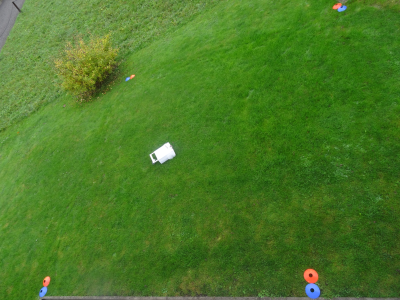

KeyboardInterrupt: ignored

In [32]:
######## Video Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/16/18
# Description: 
# This program uses a TensorFlow-trained classifier to perform object detection.
# It loads the classifier uses it to perform object detection on a video.
# It draws boxes and scores around the objects of interest in each frame
# of the video.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
import os
import time
import cv2
import numpy as np
import tensorflow as tf
import sys
import imutils
from IPython.display import clear_output

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
VIDEO_NAME = 'rasen.mov'

# Grab path to current working directory
CWD_PATH = os.getcwd()

print(CWD_PATH)

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','label_map.pbtxt')

# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,VIDEO_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)
print("ok")
i = 0
while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    if ret==True:
        
        frame = cv2.imread("/gdrive/My Drive/colabfiles/lektion20/DSC01015.JPG")
        frame_expanded = np.expand_dims(frame, axis=0)

        # Perform the actual detection by running the model with the image as input
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: frame_expanded})

        # Draw the results of the detection (aka 'visulaize the results')
        vis_util.visualize_boxes_and_labels_on_image_array(
            frame,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8,
            min_score_thresh=0.70)

        # All the results have been drawn on the frame, so it's time to display it.
        
        frame = imutils.resize(frame, 400)
        cv2_imshow(frame)
        #print(boxes)
        time.sleep(1)
        clear_output()
        

        # Press 'q' to quit
        #print(i)
        #i = i + 1
        #if cv2.waitKey(1) == ord('q'):
        #    break
    else:
        break

# Clean up
print("end1")
#video.release()
#cv2.destroyAllWindows()
print("end2")

# New Section